# Discovering and Visualizing Data

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

trainset_path = os.path.join("..","datasets","housing","train","housing_train.csv")
housing = pd.read_csv(trainset_path)
housing

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,116997.29
1,8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,118126.23
2,17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,120445.34
3,14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,117077.31
4,2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,119763.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,11284,-117.96,33.78,35.0,1330.0,201.0,658.0,217.0,6.3700,229200.0,<1H OCEAN,117926.22
16508,11964,-117.43,34.02,33.0,3084.0,570.0,1753.0,449.0,3.0500,97800.0,INLAND,117395.98
16509,5390,-118.38,34.03,36.0,2101.0,569.0,1756.0,527.0,2.9344,222100.0,<1H OCEAN,118345.97
16510,860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN,121922.42


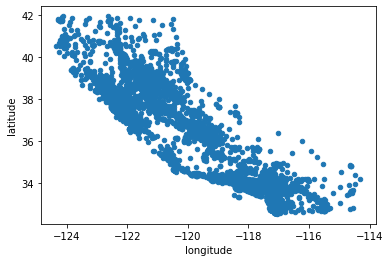

In [2]:
#To visualize the geographical information we can use a scatter diagram.
housing.plot(kind="scatter", x="longitude", y="latitude")

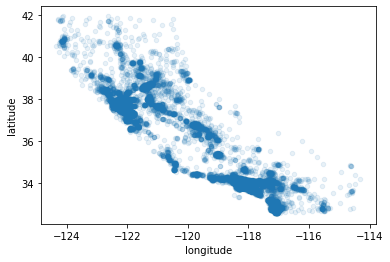

In [3]:
#We can use alpha to help us see the density at the points where more than one instance appear.
#Alpha adjusts the transparency of each instance in the diagram.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

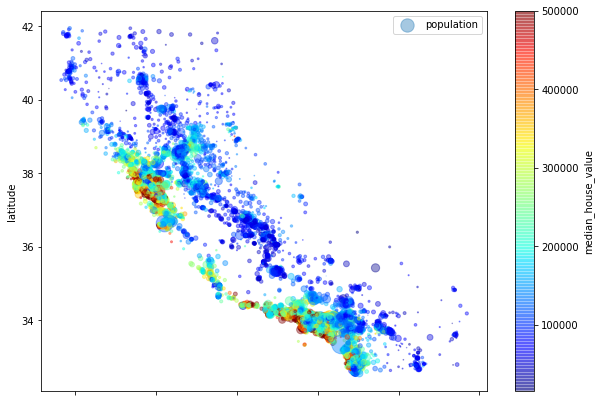

In [4]:
#We can use other columns of the dataframe to add more information to the diagram.
#We can use circle radius (s) and color (c) to add population and median_house_value.
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
            )

In [5]:
#As we can see in the diagram, the house value is strongly related to the location and population density.
#A clistering algorithm should be fit for detecting trends.

## Looking for Correlations

In [6]:
#Since the dataset is not too large, we can easily compute the standard correlation coefficient (Pearson's r)
#between every pair of attributes. We can use corr() to do this.
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
Unnamed: 0            0.069769
households            0.063714
total_bedrooms        0.047980
id                    0.046547
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

In [7]:
#Coefficients close to 1 = Strong linear correlation.
#Coefficients close to -1 = Strong negative linear correlation.
#Coefficients close to 0 = No linear correlation
#NOTE: a coefficient of 0 doesn't mean that there is no correlation, it means that there is no linear correlation.

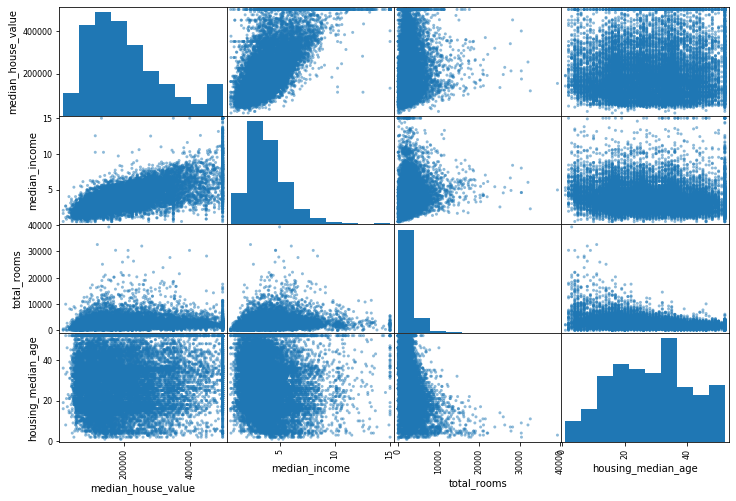

In [8]:
#We can use panda's scatter_matrix() to check the correlation of every attribute with the rest.
#But first we should discard some columns to fit the graphs.
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix = scatter_matrix(housing[attributes], figsize=(12,8))

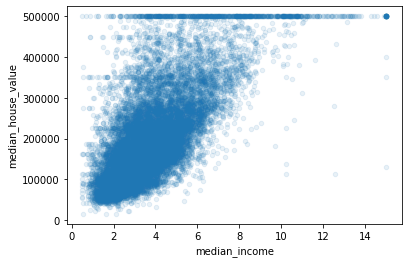

In [9]:
#The most promising attibute to predict median_house_value is the median_income. Lets focus on it.
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [10]:
#The plot shows a strong correlation.
#We can see that the data has been capped at 500000.
#We can se horizontal lines at 450000, 350000, 280000, and smaller lines going down.
#We should try to get this data out of the set to prevent the model from reporducing the data quirks.

## Experimienting with Attribute Combinations